# MNS CP 5 
Quinten de Block & Gonzalo Cardenal

## 1.Synaptic current

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.signal import find_peaks

In [2]:
Tm = 10*(10**(-3)) #s
Tsyn = 10*10**(-3) #s
Rm = 10**7 #Ohm
gstat = 30*(10**(-9)) #S
Em = -80*(10**(-3)) #V
RmIe = 0 
x_0 = 0
gsyn_0 = 0
Isynval_0= 0

In [3]:
def delta(t, tspike, dt):
    if tspike >= t and tspike < t+dt:
        return 1
    else: 
        return 0
    
def diffx(x, t, tspike, dt):
    return (-x*dt + Tsyn*gstat*delta(t, tspike, dt))/Tsyn #!!
    
def diffgsyn(x, gsyn):
    return (x - gsyn)/Tsyn

def Isyn(gsyn, V, Esyn):
    return gsyn*(V - Esyn)

def diffV(V, Isyn, gsyn):
    return (-V + Em - Rm*Isyn(gsyn, V, Esyn) + RmIe)/Tm


def euler(x_0, gsyn_0, V_0, t):
    x = np.zeros(len(t))
    gsyn = np.zeros(len(t))
    V = np.zeros(len(t))
    Isynvalues=np.zeros(len(t))
    x[0]= x_0
    gsyn[0]= gsyn_0
    V[0] = V_0
    Isynvalues[0]= Isynval_0
    for i in range(0,len(t)-1):
        x[i+1] = x[i] + diffx(x[i], t[i], tspike, dt)
        gsyn[i+1] = gsyn[i] + diffgsyn(x[i], gsyn[i])*dt
        V[i+1] = V[i] + diffV(V[i], Isyn, gsyn[i])*dt
        Isynvalues[i+1] = Isyn(gsyn[i+1], V[i+1], Esyn)
    return x, gsyn, V, Isynvalues

In [4]:
dt = 0.00001
t_max= 0.200
t = np.arange(0, t_max, dt)
tspike = 54*10**-3

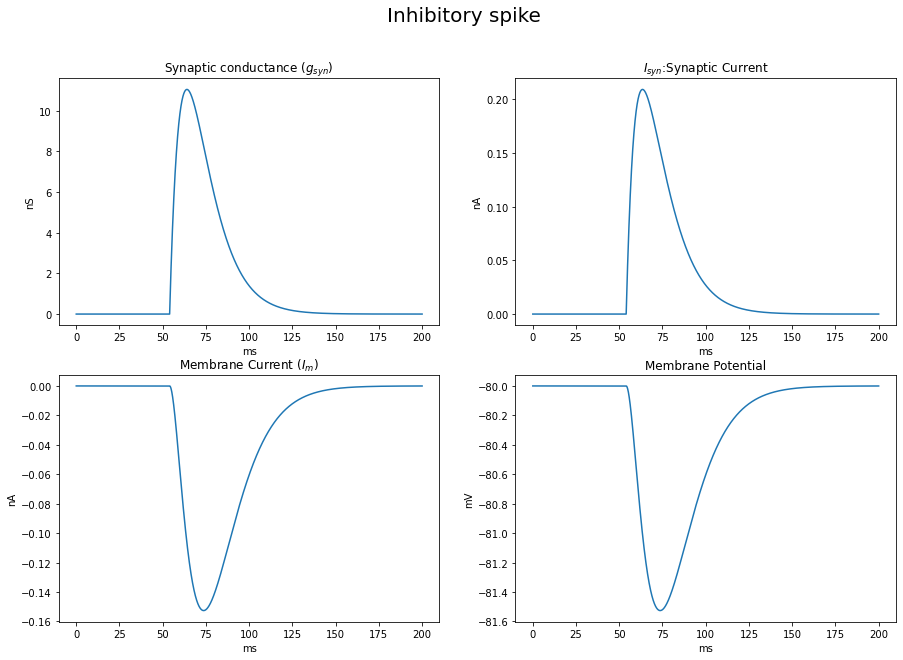

In [5]:
Esyn = Einh = -100*10**-3
x, gsyn, V, Isynvalues = euler(x_0, gsyn_0, Em, t)
Im = (V - Em)/Rm
fig, axs = plt.subplots(2,2, figsize= (15,10))
plt.suptitle("Inhibitory spike", size = 20)
plt.ticklabel_format(useOffset=False, style='plain')
axs[0,0].plot(t*10**3,gsyn*10**9)
axs[0,0].set_title("Synaptic conductance ($g_{syn}$)")
axs[0,0].set_xlabel("ms")
axs[0,0].set_ylabel("nS")
axs[0,1].plot(t*10**3,Isynvalues*10**9)
axs[0,1].set_title(r"$I_{syn}$:Synaptic Current")
axs[0,1].set_xlabel("ms")
axs[0,1].set_ylabel("nA")
axs[1,0].plot(t*10**3,Im*(10**9))
axs[1,0].set_title("Membrane Current ($I_m$)")
axs[1,0].set_xlabel("ms")
axs[1,0].set_ylabel("nA")
axs[1,1].plot(t*10**3,V*10**3)
axs[1,1].set_title("Membrane Potential")
axs[1,1].set_xlabel("ms")
axs[1,1].set_ylabel("mV");

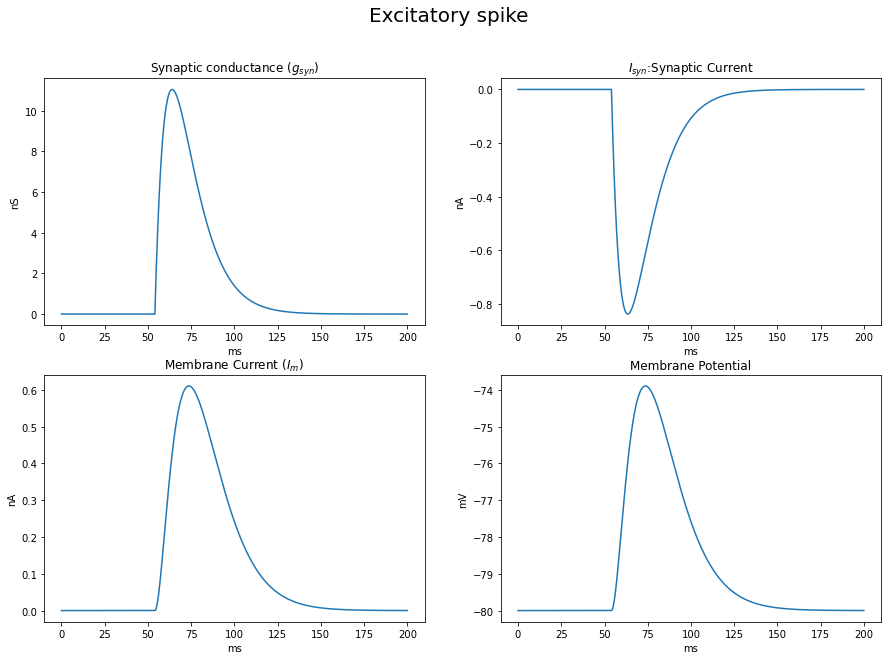

In [6]:
Esyn = Eexc = 0
x, gsyn, V, Isynvalues = euler(x_0, gsyn_0, Em, t)
Im = (V - Em)/Rm
fig, axs = plt.subplots(2,2, figsize= (15,10))
plt.suptitle("Excitatory spike", size = 20)
plt.ticklabel_format(useOffset=False, style='plain')
axs[0,0].plot(t*10**3,gsyn*10**9)
axs[0,0].set_title("Synaptic conductance ($g_{syn}$)")
axs[0,0].set_xlabel("ms")
axs[0,0].set_ylabel("nS")
axs[0,1].plot(t*10**3,Isynvalues*10**9)
axs[0,1].set_title(r"$I_{syn}$:Synaptic Current")
axs[0,1].set_xlabel("ms")
axs[0,1].set_ylabel("nA")
axs[1,0].plot(t*10**3,Im*10**9)
axs[1,0].set_title(r"Membrane Current ($I_m$)")
axs[1,0].set_xlabel("ms")
axs[1,0].set_ylabel("nA")
axs[1,1].plot(t*10**3,V*10**3)
axs[1,1].set_title("Membrane Potential")
axs[1,1].set_xlabel("ms")
axs[1,1].set_ylabel("mV");

### 1b) Shunting Inhibition

In [7]:
#Now we change the function for Isyn
def IsynSI(gsyn, V, Esyn):
    return gsyn*(V-Esyn) + gexc*(V-Eexc) + ginh*(V-Einh)

Einh= -100*10**-3 #mV
Eexc= 0 #mV
gexc= 50*10**-9 #nS
ginh= 200*10**-9 #nS

def diffVSI(V, IsynSI, gsyn):
    return (-V + Em - Rm*IsynSI(gsyn, V, Esyn) + RmIe)/Tm

def eulerSI(x_0, gsyn_0, V_0, t):
    x = np.zeros(len(t))
    gsyn = np.zeros(len(t))
    V = np.zeros(len(t))
    x[0]= x_0
    gsyn[0]= gsyn_0
    V[0] = V_0
    IsynvaluesSI=np.zeros(len(t))
    for i in range(0,len(t)-1):
        IsynvaluesSI[i] = IsynSI(gsyn[i], V[i], Esyn)
        x[i+1] = x[i] + diffx(x[i], t[i], tspike, dt)
        gsyn[i+1] = gsyn[i] + diffgsyn(x[i+1], gsyn[i])*dt
        V[i+1] = V[i] + diffVSI(V[i], IsynSI, gsyn[i+1])*dt
    return x, gsyn, V, IsynvaluesSI

The maximum voltage with Shunting inhibition and Excitatory is -77.6653
The maximum voltage without Shunting inhibition is -73.8969


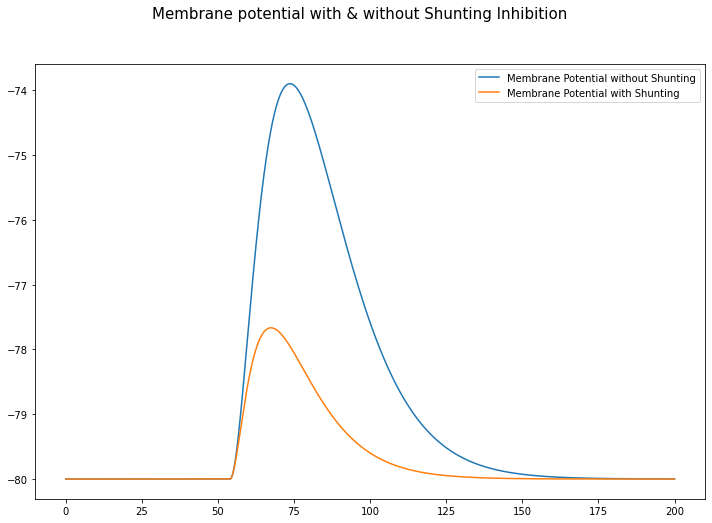

In [8]:
Esyn = Eexc
xSI1, gsynSI1, VSI1, IsynvaluesSI1 = eulerSI(x_0, gsyn_0, Em, t)
x1, gsyn1, V1, Isynvalues1 = euler(x_0, gsyn_0, Em, t)
Esyn = Einh
xSI2, gsynSI2, VSI2, IsynvaluesSI2 = eulerSI(x_0, gsyn_0, Em, t)
x2, gsyn2, V2, Isynvalues2 = euler(x_0, gsyn_0, Em, t)

figSI, axsSI = plt.subplots( 1, 1, figsize= (12,8))
plt.suptitle('Membrane potential with & without Shunting Inhibition', size =15)
axsSI.ticklabel_format(useOffset=False, style='plain')
axsSI.plot(t*10**3,V*10**3)
axsSI.plot(t*10**3,VSI1*10**3)
axsSI.legend(['Membrane Potential without Shunting', 'Membrane Potential with Shunting'])


print('The maximum voltage with Shunting inhibition and Excitatory is ' + str(round(np.max(VSI1)*10**3,4)))
print('The maximum voltage without Shunting inhibition is ' + str(round(np.max(V)*10**3,4)));

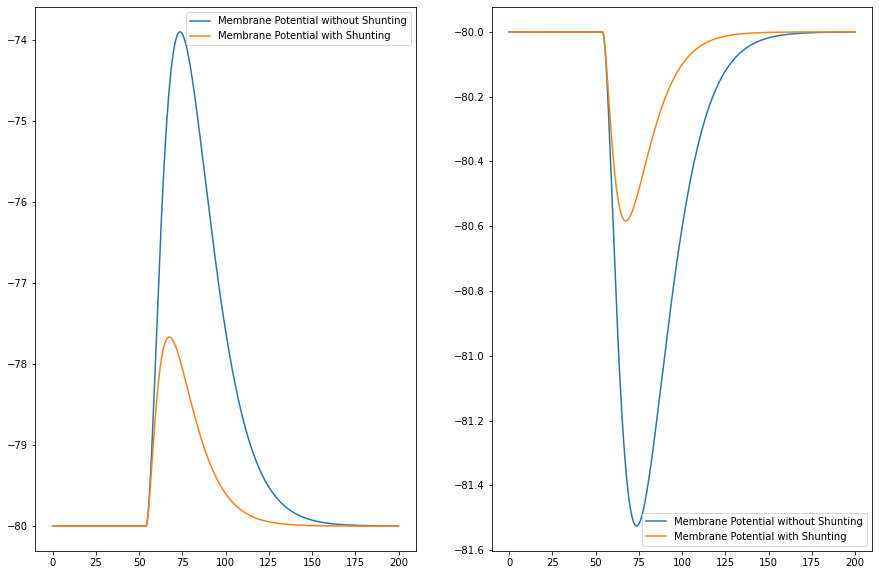

In [9]:
##This one was not needed
figSI, axsSI = plt.subplots( 1, 2, figsize= (15,10))
axsSI[0].ticklabel_format(useOffset=False, style='plain')
axsSI[0].plot(t*10**3,V*10**3)
axsSI[0].plot(t*10**3,VSI1*10**3)
axsSI[0].legend(['Membrane Potential without Shunting', 'Membrane Potential with Shunting'])
axsSI[1].ticklabel_format(useOffset=False, style='plain')
axsSI[1].plot(t*10**3,V2*10**3)
axsSI[1].plot(t*10**3,VSI2*10**3)
axsSI[1].legend(['Membrane Potential without Shunting', 'Membrane Potential with Shunting'])

#### Why the differences?
Comparing voltages, the membrane potential without shunting inhibition had a bigger response to the presynaptic excitatory input than the one with. Moreover, the one without shunting inhibition had as well a broader curve. 
The reason for this lies 

## Exercise 2. Integrate-and-fire neuron

#### a) Setting a reset treshold

In [10]:
Vthresh= -54*10**-3 #V
Vreset = Em #V

In [11]:
def diffVIsyn0(V, RmIe):
    return (-V + Em + RmIe)/Tm

def eulerreset(V_0, t):
    V = np.zeros(len(t))
    V[0] = V_0
    for i in range(0,len(t)-1):
        if V[i] >= Vthresh :
            V[i+1] = Vreset
        else:
            V[i+1] = V[i] + diffVIsyn0(V[i], RmIe)*dt
    return V 

#### b) Voltage traces over 100ms with constant input current

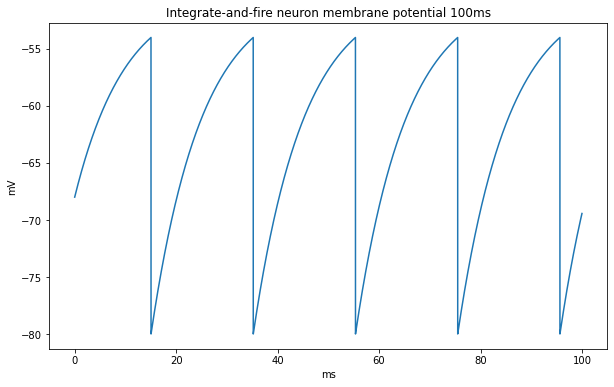

The firing rate using spike count for 100 ms is 50.0 Hz.
The firing rate calculated by ISI for 100 ms is 49.63 Hz.


In [12]:
RmIe = 10**7 * 3*10**-9 #Ohm*A = V
dt = 0.00001
t_max= 0.1
t = np.arange(0,t_max,dt)
Vres = eulerreset(-random.randint(round(-Vthresh*10**3),round(-Em*10**3))/10**3, t)

plt.figure(figsize=(10,6))
plt.plot(t*10**3,Vres*10**3)
plt.xlabel("ms")
plt.ylabel("mV")
plt.title("Integrate-and-fire neuron membrane potential 100ms")
plt.show()

fires,prop = find_peaks(Vres)

firing_rate_1 = round(len(fires) / t_max,2)

firing_rate_isi_1 = np.zeros(len(fires)-1) 
for p in range (0,len(fires)-1):
    firing_rate_isi_1[p] =(fires[p+1]-fires[p])*dt
firing_rate_isi_1 = round(1/np.mean(firing_rate_isi_1),2)

print('The firing rate using spike count for 100 ms is ' + str(firing_rate_1) + ' Hz.')
print('The firing rate calculated by ISI for 100 ms is ' + str(firing_rate_isi_1) + ' Hz.')

We can observe both measures doesn't coincide. The ISIS method gives a more precise value. As it counts avarage inter-spike interval, its accuracy depends only on dt. In the other hand, the spike count sometimes give 40Hz and other 50Hz as It depends on the initialization of the voltage which is random. Thus, we could conclude spike count doesn't work well for small time windows.

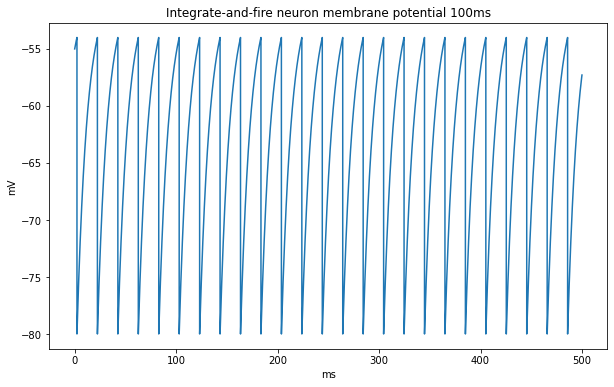

The firing rate using spike count for 500 ms is 50.0 Hz.
The firing rate calculated by ISI for 500 ms is 49.63 Hz.


In [13]:
RmIe = 10**7 * 3*10**-9 #Ohm*A = V
dt = 0.00001
t_max= 0.5
t = np.arange(0,t_max,dt)
Vres = eulerreset(-random.randint(round(-Vthresh*10**3),round(-Em*10**3))/10**3, t)

plt.figure(figsize=(10,6))
plt.plot(t*10**3,Vres*10**3)
plt.xlabel("ms")
plt.ylabel("mV")
plt.title("Integrate-and-fire neuron membrane potential 100ms")
plt.show()

fires,prop = find_peaks(Vres)

firing_rate_1 = round(len(fires) / t_max,2)

firing_rate_isi_1 = np.zeros(len(fires)-1) 
for p in range (0,len(fires)-1):
    firing_rate_isi_1[p] =(fires[p+1]-fires[p])*dt
firing_rate_isi_1 = round(1/np.mean(firing_rate_isi_1),2)

print('The firing rate using spike count for 500 ms is ' + str(firing_rate_1) + ' Hz.')
print('The firing rate calculated by ISI for 500 ms is ' + str(firing_rate_isi_1) + ' Hz.')

Now the spike count is giving a more precise value as the time window is bigger. The result of ISI doesn't change as dt continue to be the same one.
For this reason, we should use ISI method for small time windows.

### c) Calculating numerically the mean fire rate as function of input current in the range 0nA to 5nA 

In [71]:
Ie = np.linspace(0, 5*10**-9, 30)
RmIe= np.array(10**7 * Ie)

In [93]:
def firing_rates_over_Ie(V_0, Ie):
    firing_rate_count=np.zeros(len(Ie))
    firing_rate_isi=np.zeros(len(Ie))
    firing_rate_theorical=np.zeros(len(Ie))
    
    V = np.zeros(len(t))
    V[0] = Em
    for i in range(0,len(Ie)):
        #calculate voltage for each Ie iteration
        for j in range(0,len(t)-1):
            if V[j] >= Vthresh :
                V[j+1] = Vreset
            else:
                V[j+1] = V[j] + diffVIsyn0(V[j], 10**7*Ie[i])*dt

        fires,prop = find_peaks(V)

        firing_rate_count[i] = round(len(fires) / t_max,2)
        
        if firing_rate_count[i] > 0:
            
            fire_rate_isi = np.zeros(len(fires)-1) 
            
            for p in range (0,len(fires)-1):
                fire_rate_isi =(fires[p+1]-fires[p])*dt
                
            firing_rate_isi[i] = (np.mean(fire_rate_isi))**-1


        if Rm*Ie[i]/(Rm*Ie[i]+Em-Vthresh) <= 0:
            firing_rate_theorical[i]= 0
        else:
            firing_rate_theorical[i]= (Tm*np.log(Rm*Ie[i]/(Rm*Ie[i]+Em-Vthresh)))**-1

    return firing_rate_count, firing_rate_isi, firing_rate_theorical

In [94]:
firing_rate_count, firing_rate_isi, firing_rate_theorical = firing_rates_over_Ie(-random.randint(round(-Vthresh*10**3),round(-Em*10**3))/10**3,Ie)

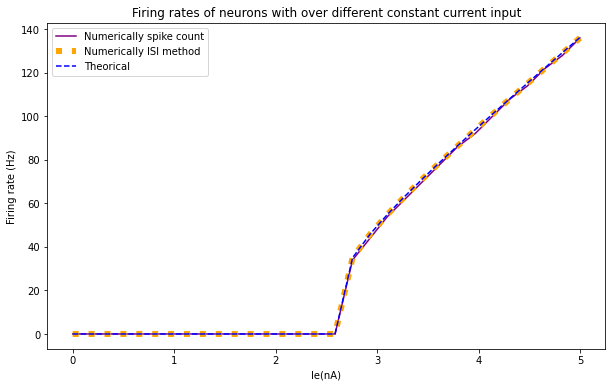

In [100]:
plt.figure(figsize=(10,6))
plt.plot(Ie*10**9,firing_rate_count, label="Numerically spike count", color= 'purple')
plt.plot(Ie*10**9,firing_rate_isi, label="Numerically ISI method", color='orange', linestyle="dotted", linewidth=6)
plt.plot(Ie*10**9,firing_rate_theorical, label="Theorical", color='blue', linestyle="dashed")
plt.legend()
plt.xlabel("Ie(nA)")
plt.ylabel("Firing rate (Hz)")
plt.title("Firing rates of neurons with over different constant current input")
plt.show()

mse_firing_count= sum(((firing_rate_theorical-firing_rate_count)**2))/len(firing_rate_theorical)
mse_firing_rate_isi= sum(((firing_rate_theorical-firing_rate_isi)**2))/len(firing_rate_theorical)

In [102]:
print('The MSE of the spike count method is ' + str(round(mse_firing_count,4)) + ' and the MSE of ISI method is ' + str(round(mse_firing_rate_isi,4)))

The MSE of the spike count method is 0.5978 and the MSE of ISI method is 0.0077


Results Interpretation:

Until the current arrives to the minimum nA to trigger the neuron firing and overcome the threshold the firing rate frequency is 0. Afterwards, the frecuency follows a semilinear fuction over the current input.

The MSE of the spike count method is bigger than the one of ISI. Again we can conclude ISI method is better.

In a real neuron, we expect to see the same until it gets saturated and arrives to its maximum firing rate.

#### 3)Synaptically coupled IF neurons 